<a href="https://colab.research.google.com/github/markerxz/naturalselection/blob/main/naturalselection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def simulation(sizei = 1000,sizej = 1000, n_food = 100, n_creature = 100,mutantvalue = 0.05,n_gen = 200,maxtime = 50,age = 4): 
    import random
    import matplotlib.pyplot as plt
    from matplotlib import cm
    import numpy as np
    def genfood():
        foodzonei = [int(0 + sizei//10) , int(sizei - sizei//10)]
        foodzonej = [int(0 + sizej//10) , int(sizej - sizej//10)]
        food = []
        for j in range(n_food):
            food.append((random.uniform(foodzonei[0],foodzonei[1]),random.uniform(foodzonej[0],foodzonej[1])))
        return food
    import math
    def checkbound(offset,pos):

        i = offset[0]
        j = offset[1]
        if offset[0] + pos[0] > sizei:
            offset[0] = sizei - pos[0]
        if offset[0] + pos[0] < 0:
            offset[0] = (pos[0]*-1)
        if offset[1] + pos[1] > sizej:
            offset[1] = sizej - pos[1]
        if offset[1] + pos[1] < 0:
            offset[1] = (pos[1]*-1)
        return offset

    class Creatures:
        def randspawn(self):
            side = random.randint(1,4)
            if side == 1:
                yo = [(0.1  * sizei),random.uniform((0.1  * sizej),(0.9  * sizej))]
            if side == 2:
                yo = [(0.9  * sizei),random.uniform((0.1  * sizej),(0.9  * sizej))]
            if side == 3:
                yo = [random.uniform((0.1  * sizei),(0.9  * sizei)),(0.1  * sizei)]
            if side == 4:
                yo = [random.uniform((0.1  * sizei),(0.9  * sizei)),(0.9  * sizei)]
            return yo
        speed = 10
        sight = 10
        pos = [0,0]
        hunger = False
        name = ' '
        score = 0
        def __init__(self):
            self.speed = 30
            self.sight = 30
            self.pos = self.randspawn()
            self.hunger = False
            self.name = ' '
            self.score = 0
            self.age = age
        def randmov(self):
            di = random.uniform(0,360)
            offset = checkbound([self.speed*math.sin(di),self.speed*math.cos(di)],self.pos)
            self.pos[0] += offset[0]
            self.pos[1] += offset[1]
            return offset
        def checkfood(self):
            dis = [((food[i][0]-self.pos[0])**2+(food[i][1]-self.pos[1])**2)**(1/2) for i in range(len(food))]
            i = 0
            while i < len(food):
                if dis[i] <= self.sight:
                    self.score += 1
                    food.pop(i)
                    return 
                i+=1

    import numpy as np
    from matplotlib import pyplot as plt
    from matplotlib import animation
    creatures = [Creatures() for i in range(n_creature)]
    poscreas = [[] for i in range(n_gen)]
    posfood = [[] for i in range(n_gen)]

    maxspeed = 5000
    maxsight = 5000
    speedcrea = [[0 for i in range(maxspeed)] for i in range(n_gen)]
    sightcrea = [[0 for i in range(maxsight)] for i in range(n_gen)]
    maxsp_in_gen = [0 for i in range(n_gen)]
    minsp_in_gen = [2e9 for i in range(n_gen)]
    avgsp_in_gen = [0 for i in range(n_gen)]
    maxsi_in_gen = [0 for i in range(n_gen)]
    minsi_in_gen = [2e9 for i in range(n_gen)]
    avgsi_in_gen = [0 for i in range(n_gen)]
    n_creaz = [0 for i in range(n_gen)]
    gen = 0
    for gen in range(n_gen):
        food = genfood()
        for crea in creatures:
            crea.pos = crea.randspawn()
        time = 0
        poscreas_in_this_gen = list([])
        posfood_in_this_gen = list([])
        while time < maxtime:
            poscreas_in_this_gen.append([])
            posfood_in_this_gen.append([])
            for crea in creatures:
                crea.randmov()
                crea.checkfood()
                cache = [crea.pos[0],crea.pos[1]]
                poscreas_in_this_gen[-1].append(cache)
            for f in food:
                cache = [f[0],f[1]]
                posfood_in_this_gen[-1].append(cache)
            time+=1
        newcreas = []
        for crea in creatures:
            maxsp_in_gen[gen] = max(maxsp_in_gen[gen],int(crea.speed))
            maxsi_in_gen[gen] = max(maxsi_in_gen[gen],int(crea.sight))
            avgsp_in_gen[gen] += int(crea.speed)
            avgsi_in_gen[gen] += int(crea.sight)
            minsp_in_gen[gen] = min(minsp_in_gen[gen],int(crea.speed))
            minsi_in_gen[gen] = min(minsi_in_gen[gen],int(crea.sight))
            speedcrea[gen][int(crea.speed)]+=1
            sightcrea[gen][int(crea.sight)]+=1
        avgsp_in_gen[gen] /= len(creatures)
        avgsi_in_gen[gen] /= len(creatures)
        n_creaz[gen] = len(creatures)
        maxsp = -1
        maxsi = -1
        for i in range(len(creatures)):
            crea = creatures[i]
            if crea.score >= 2:
                parent = Creatures()
                parent.speed = crea.speed
                parent.sight = crea.sight
                parent.age = crea.age-1
                for i in range(crea.score//2):
                    newborn = Creatures()
                    newborn.speed = parent.speed * random.uniform(1-mutantvalue,1+mutantvalue)
                    newborn.sight = parent.sight * random.uniform(1-mutantvalue,1+mutantvalue)
                    maxsp = max(maxsp,newborn.speed)
                    maxsi = max(maxsi,newborn.sight)
                    newcreas.append(newborn)
                if parent.age >=1:
                    newcreas.append(parent)
            elif crea.score == 1:
                parent = Creatures()
                parent.speed = crea.speed
                parent.sight = crea.sight
                parent.age = crea.age-1
                if parent.age >=1:
                    newcreas.append(parent)
        creatures = newcreas[:]
        random.shuffle(creatures)
        poscreas[gen]= list(poscreas_in_this_gen[:])
        posfood[gen]= list(posfood_in_this_gen[:])
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6), dpi=80)
    line1, = ax1.plot(np.arange(0, n_gen, 1),avgsp_in_gen[:n_gen],color='b',label ='Speed')
    line2, = ax1.plot(np.arange(0, n_gen, 1),avgsi_in_gen[:n_gen],color='r',label ='Sight')
    ax1.fill_between(np.arange(0, n_gen, 1), maxsp_in_gen[:n_gen],minsp_in_gen[:n_gen], alpha=0.2,color='b')
    ax1.fill_between(np.arange(0, n_gen, 1), maxsi_in_gen[:n_gen],minsi_in_gen[:n_gen], alpha=0.2,color='r')
    ax2.set_ylim([0,100])
    ax1.set_xlim([0,n_gen])
    ax1.grid()
    ax2.plot(np.arange(0, n_gen, 1),n_creaz[:n_gen],color='g')
    ax2.grid()
    ax1.legend((line1, line2), ('Speed', 'Sight'), loc='upper left', shadow=True)
    st = str('mutantrate = '+str(mutantvalue))
    ax1.set_title(st)
    ax2.set_title('number of creature(s)')
    print('Food :',n_food, ' n_creature :',n_creature,' n_gen : ',n_gen,' maxtime : ',maxtime)
  



Food : 100  n_creature : 100  n_gen :  200  maxtime :  50


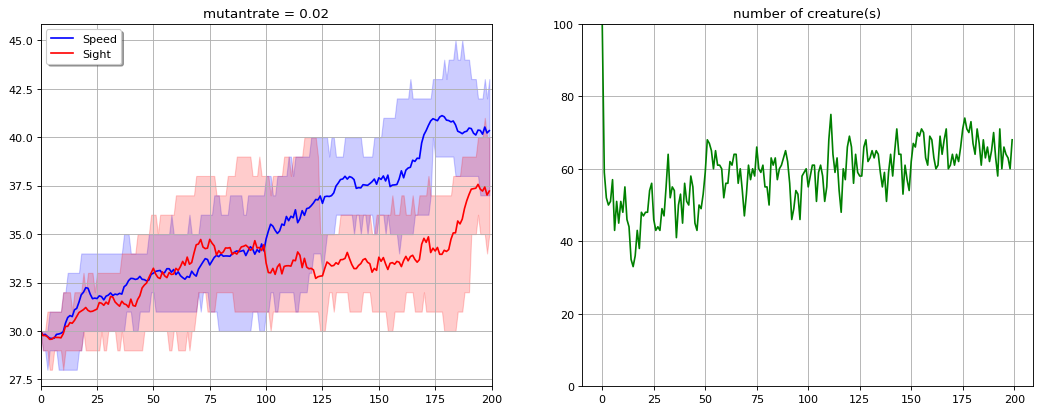

In [2]:
simulation(mutantvalue = 0.02,n_gen = 200)

Food : 100  n_creature : 100  n_gen :  200  maxtime :  50


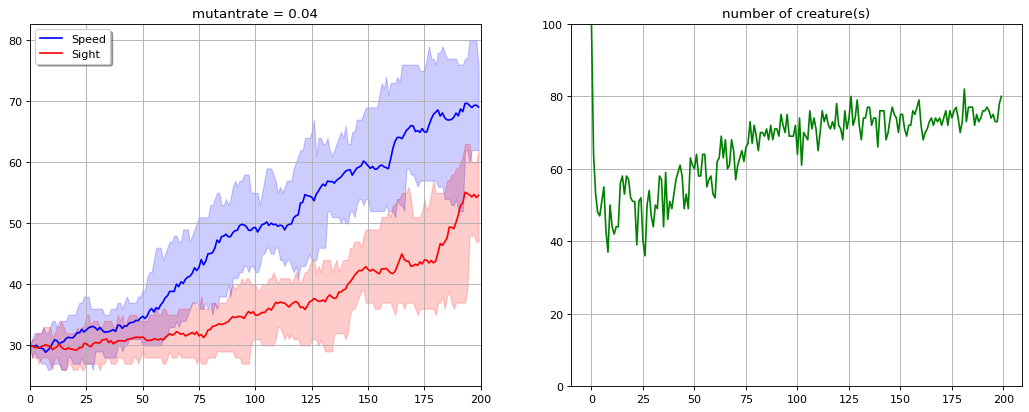

In [3]:
simulation(mutantvalue = 0.04,n_gen = 200)

Food : 100  n_creature : 100  n_gen :  200  maxtime :  50


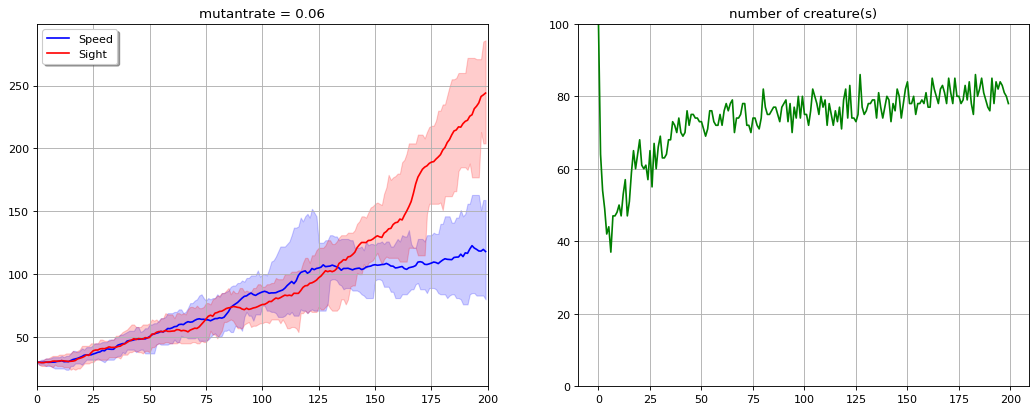

In [4]:
simulation(mutantvalue = 0.06,n_gen = 200)

Food : 100  n_creature : 100  n_gen :  200  maxtime :  50


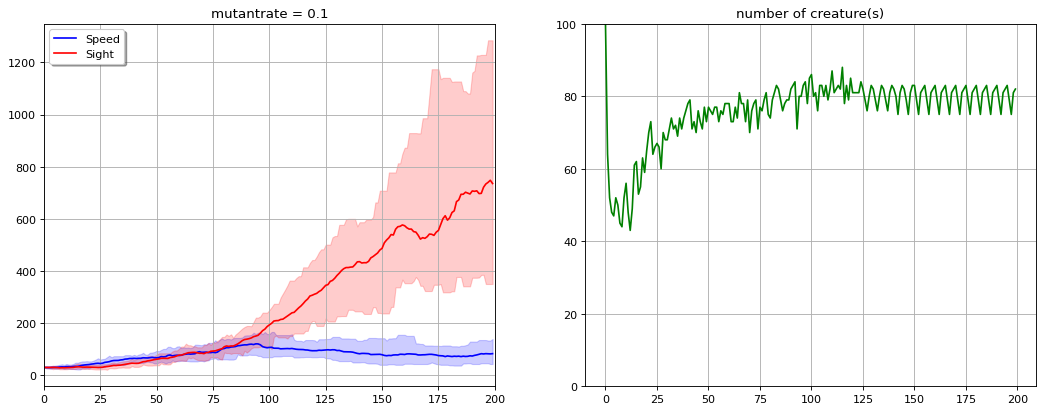

In [5]:
simulation(mutantvalue = 0.1,n_gen = 200)

Food : 100  n_creature : 100  n_gen :  1000  maxtime :  50


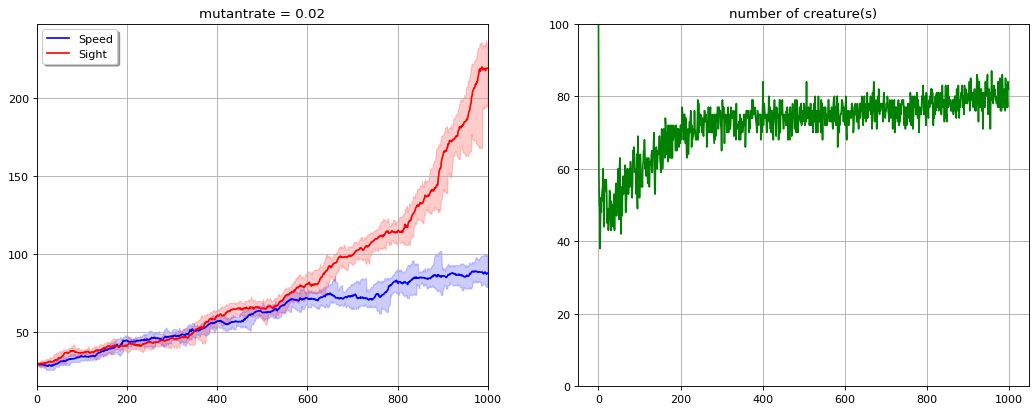

In [7]:
simulation(mutantvalue = 0.02,n_gen = 1000)

In [6]:
def simulation_gene_comparison_nsim(sizei = 1000,sizej = 1000, 
                                    n_food = 100, n_creatureA = 50,AGE = {'A':4,'B':4},
                                    n_creatureB = 50,mutantvalueA = 0.04,mutantvalueB = 0.1,
                                    n_gen = 200,maxtime = 50,number_of_simulations = 10): 
    import random
    import matplotlib.pyplot as plt
    from matplotlib import cm
    import numpy as np
    def genfood():
        foodzonei = [int(0 + sizei//10) , int(sizei - sizei//10)]
        foodzonej = [int(0 + sizej//10) , int(sizej - sizej//10)]
        food = []
        for j in range(n_food):
            food.append((random.uniform(foodzonei[0],foodzonei[1]),random.uniform(foodzonej[0],foodzonej[1])))
        return food
    import math
    def checkbound(offset,pos):
        i = offset[0]
        j = offset[1]
        if offset[0] + pos[0] > sizei:
            offset[0] = sizei - pos[0]
        if offset[0] + pos[0] < 0:
            offset[0] = (pos[0]*-1)
        if offset[1] + pos[1] > sizej:
            offset[1] = sizej - pos[1]
        if offset[1] + pos[1] < 0:
            offset[1] = (pos[1]*-1)
        return offset
    class Creatures:
        def randspawn(self):
            side = random.randint(1,4)
            if side == 1:
                yo = [(0.1  * sizei),random.uniform((0.1  * sizej),(0.9  * sizej))]
            if side == 2:
                yo = [(0.9  * sizei),random.uniform((0.1  * sizej),(0.9  * sizej))]
            if side == 3:
                yo = [random.uniform((0.1  * sizei),(0.9  * sizei)),(0.1  * sizei)]
            if side == 4:
                yo = [random.uniform((0.1  * sizei),(0.9  * sizei)),(0.9  * sizei)]
            return yo
        speed = 10
        sight = 10
        pos = [0,0]
        hunger = False
        name = ' '
        score = 0
        def __init__(self, mutantrate,gene,age):
            self.speed = 30
            self.sight = 30
            self.pos = self.randspawn()
            self.hunger = False
            self.name = ' '
            self.score = 0
            self.age = age
            self.mutantrate = mutantrate
            self.gene = gene

        def randmov(self):
            di = random.uniform(0,360)
            offset = checkbound([self.speed*math.sin(di),self.speed*math.cos(di)],self.pos)
            self.pos[0] += offset[0]
            self.pos[1] += offset[1]
            return offset
        def checkfood(self):
            dis = [((food[i][0]-self.pos[0])**2+(food[i][1]-self.pos[1])**2)**(1/2) for i in range(len(food))]
            i = 0
            while i < len(food):
                if dis[i] <= self.sight:
                    self.score += 1
                    food.pop(i)
                    return 
                i+=1
    maxspeed = 200
    maxsight = 200
    winner = {'A':[],'B':[]}
    winny = {'A':[0 for i in range(n_gen)],'B':[0 for i in range(n_gen)]}
    n_creaz_all = {'A':[0 for i in range(n_gen)],'B':[0 for i in range(n_gen)]}
    lastgen = {'A':{'speed':[0 for i in range(maxspeed)],'sight':[0 for i in range(maxspeed)]},'B' : {'speed':[0 for i in range(maxspeed)],'sight':[0 for i in range(maxspeed)]}}
    for SIM in range(number_of_simulations):
        creatures = []
        for i in range(n_creatureA):
            creatures.append(Creatures(mutantrate = mutantvalueA,gene = 'A',age = AGE['A']))
        for i in range(n_creatureB):
            creatures.append(Creatures(mutantrate = mutantvalueB,gene = 'B',age = AGE['B']))
        n_creaz = {'A':[0 for i in range(n_gen)],'B':[0 for i in range(n_gen)]}
        gen = 0
        hey = False
        while gen < n_gen:
            food = genfood()
            for crea in creatures:
                crea.pos = crea.randspawn()
            time = 0
            while time < maxtime:
                for crea in creatures:
                    crea.randmov()
                    crea.checkfood()
                time+=1
            newcreas = []
            
            for i in range(len(creatures)):
                crea = creatures[i]
                n_creaz[crea.gene][gen] += 1
                if crea.score >= 1:
                    parent = Creatures(mutantrate = crea.mutantrate,gene = crea.gene,age = crea.age-1)
                    parent.speed = crea.speed
                    parent.sight = crea.sight
                    for j in range(crea.score//2):
                        newborn = Creatures(mutantrate = crea.mutantrate,gene = crea.gene,age = AGE[crea.gene])
                        newborn.speed = parent.speed * random.uniform(1-newborn.mutantrate,1+parent.mutantrate)
                        newborn.sight = parent.sight * random.uniform(1-newborn.mutantrate,1+parent.mutantrate)
                        newcreas.append(newborn)
                    if parent.age >=1:
                        newcreas.append(parent)
            n_creaz_all['A'][gen] += n_creaz['A'][gen]
            n_creaz_all['B'][gen] += n_creaz['B'][gen]
            if n_creaz['A'][gen] == 0:
                if hey == False:
                    winner['B'].append(gen)
                    winny['B'][gen] += 1
                    hey = True
            elif n_creaz['B'][gen] == 0:
                if hey == False:
                    winner['A'].append(gen)
                    winny['A'][gen] += 1
                    hey = True
            creatures = newcreas[:]
            random.shuffle(creatures)
            gen += 1
        for crea in creatures:
            lastgen[crea.gene]['speed'][int(crea.speed)] += 1
            lastgen[crea.gene]['sight'][int(crea.sight)] += 1
    n_creaz_all['A'] = [n_creaz_all['A'][g]/number_of_simulations for g in range(n_gen)]
    n_creaz_all['B'] = [n_creaz_all['B'][g]/number_of_simulations for g in range(n_gen)]

    for i in range(n_gen):
        if n_creaz_all['A'][i] == 0 and n_creaz_all['B'][i] == 0:
            n_gen = i
            break
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(19,6), dpi=80)
    ax1.set_xlim([0,n_gen-2])
    ax1.set_ylim([0,max([winny['A'][i] + winny['B'][i] for i in range(n_gen-1)])+1])
    ax2.set_xlim([0,n_gen-2])
    ax2.set_ylim([0,max([n_creaz_all['A'][i] + n_creaz_all['B'][i] for i in range(n_gen-1)])])
    #line1, = ax1.bar(np.arange(0, n_gen-1, 1),[winny['A'][i] + winny['B'][i] for i in range(n_gen-1)],color='#FF6E5A')
    line1 = ax1.bar(np.arange(0, n_gen-1, 1), [winny['A'][i] + winny['B'][i] for i in range(n_gen-1)], 0.6, color='#FF6E5A')
    line2 = ax1.bar(np.arange(0, n_gen-1, 1),winny['B'][:n_gen-1], 0.6,color='#90DCFF')
    line5, = ax2.plot(np.arange(0, n_gen-1, 1),[n_creaz_all['A'][i] + n_creaz_all['B'][i] for i in range(n_gen-1)],color='#FF6E5A')
    line6, = ax2.plot(np.arange(0, n_gen-1, 1),n_creaz_all['B'][:n_gen-1],color='#90DCFF')
    ax2.fill_between(np.arange(0, n_gen-1, 1), [n_creaz_all['A'][i] + n_creaz_all['B'][i] for i in range(n_gen-1)],n_creaz_all['B'][:n_gen-1], alpha=0.2,color='#FF6E5A')
    ax2.fill_between(np.arange(0, n_gen-1, 1), n_creaz_all['B'][:n_gen-1],0, alpha=0.2,color='#90DCFF')
    ga = 'Gene ('+ str(mutantvalueA) +' : '+str(AGE['A'])+' days )'
    gb = 'Gene ('+ str(mutantvalueB) +' : '+str(AGE['B'])+' days )'
    ax1.set_title('Generation where each Gene type will dominate')
    ax1.legend((line1,line2),(ga,gb),loc='upper left',shadow = True)
    ax2.set_title('Average number of creatures across the simulations')
    ax2.legend((line5, line6), (ga,gb), loc='upper left', shadow=True)
    #print([lastgen['A']['speed'][i] + lastgen['B']['speed'][i] for i in range(maxspeed)])ax1.set_title('Generation where each Gene type will dominate')
    ax3.set_title('Speed Distribution')
    ax4.set_title('Sight Distribution')
    
    line7 = ax3.bar(np.arange(0, maxspeed, 1),[lastgen['A']['speed'][i] + lastgen['B']['speed'][i] for i in range(maxspeed)] , 0.5, color='#FF6E5A')
    line8 = ax4.bar(np.arange(0, maxsight, 1), [lastgen['A']['sight'][i] + lastgen['B']['sight'][i] for i in range(maxspeed)], 0.5, color='#FF6E5A')
    line9 = ax3.bar(np.arange(0, maxspeed, 1), [lastgen['B']['speed'][i] for i in range(maxspeed)], 0.5, color='#90DCFF')
    line10 = ax4.bar(np.arange(0, maxspeed, 1), [lastgen['B']['sight'][i] for i in range(maxspeed)], 0.5, color='#90DCFF')
    ax3.legend((line7, line9), (ga,gb), loc='upper left', shadow=True)
    ax4.legend((line8, line10), (ga,gb), loc='upper left', shadow=True)
    fig.tight_layout()

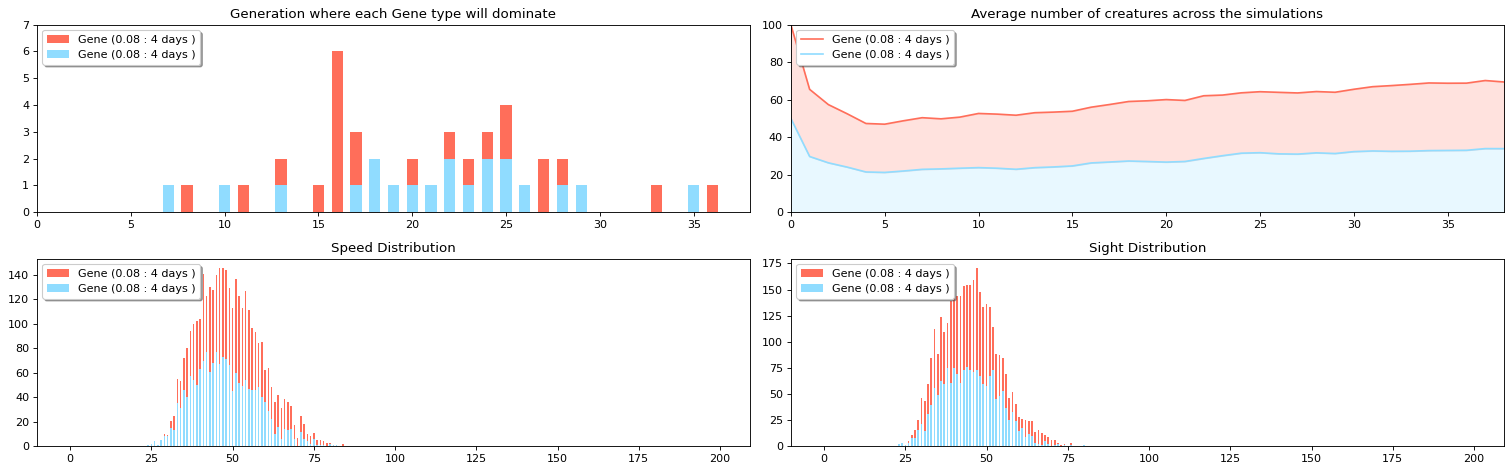

In [8]:
simulation_gene_comparison_nsim(mutantvalueA = 0.08,mutantvalueB = 0.08,AGE = {'A':4,'B':4},number_of_simulations = 50,n_gen = 40)

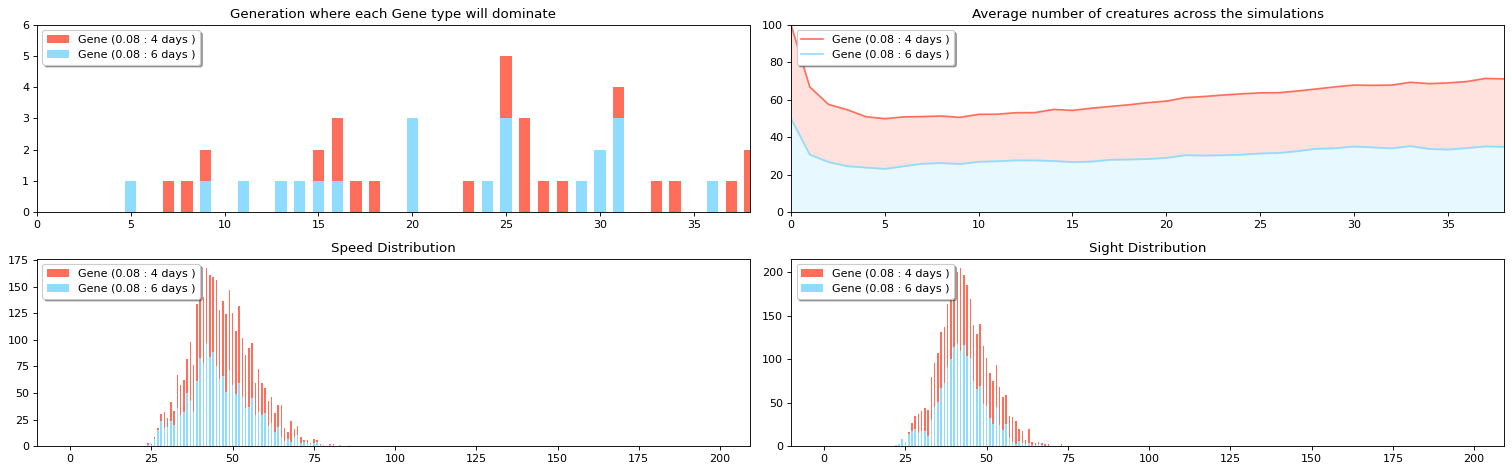

In [9]:
simulation_gene_comparison_nsim(mutantvalueA = 0.08,mutantvalueB = 0.08,AGE = {'A':4,'B':6},number_of_simulations = 50,n_gen = 40)

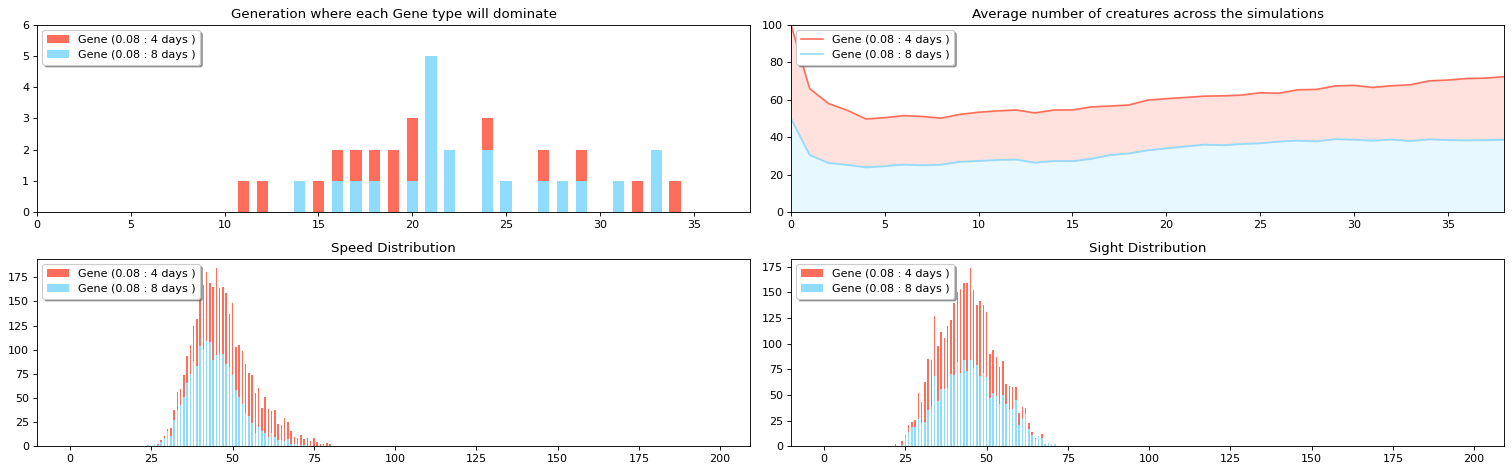

In [10]:
simulation_gene_comparison_nsim(mutantvalueA = 0.08,mutantvalueB = 0.08,AGE = {'A':4,'B':8},number_of_simulations = 50,n_gen = 40)

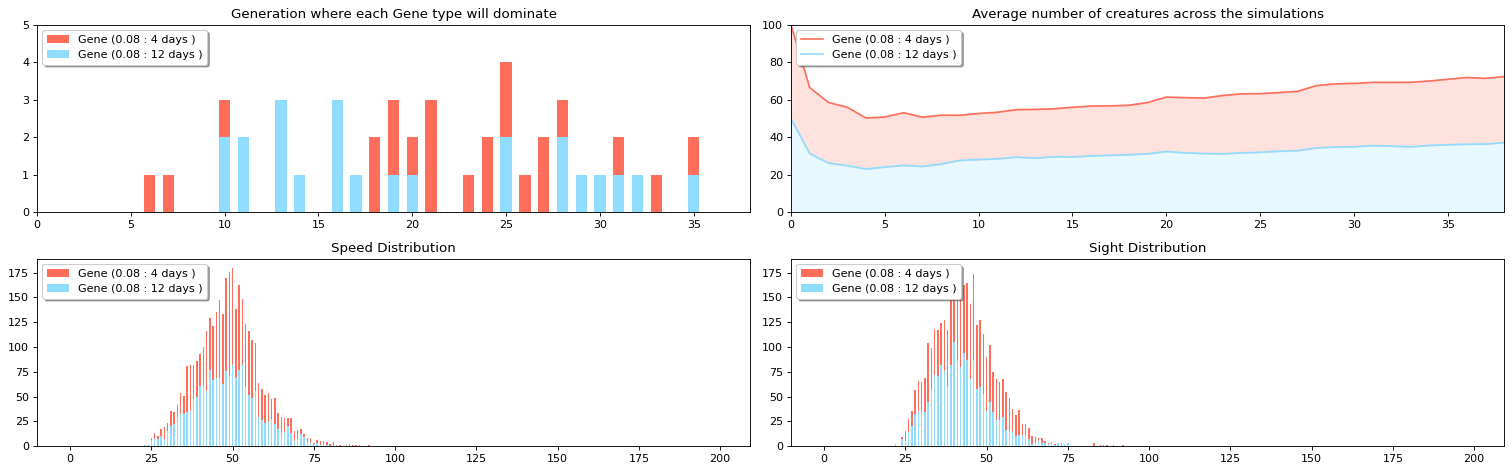

In [11]:
simulation_gene_comparison_nsim(mutantvalueA = 0.08,mutantvalueB = 0.08,AGE = {'A':4,'B':12},number_of_simulations = 50,n_gen = 40)

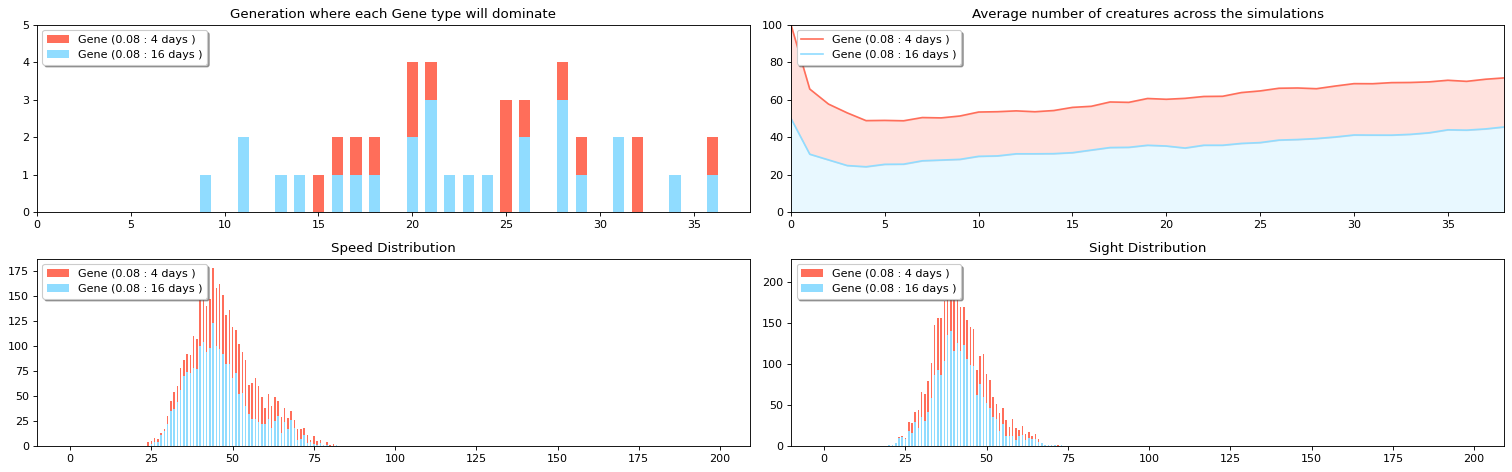

In [12]:
simulation_gene_comparison_nsim(mutantvalueA = 0.08,mutantvalueB = 0.08,AGE = {'A':4,'B':16},number_of_simulations = 50,n_gen = 40)

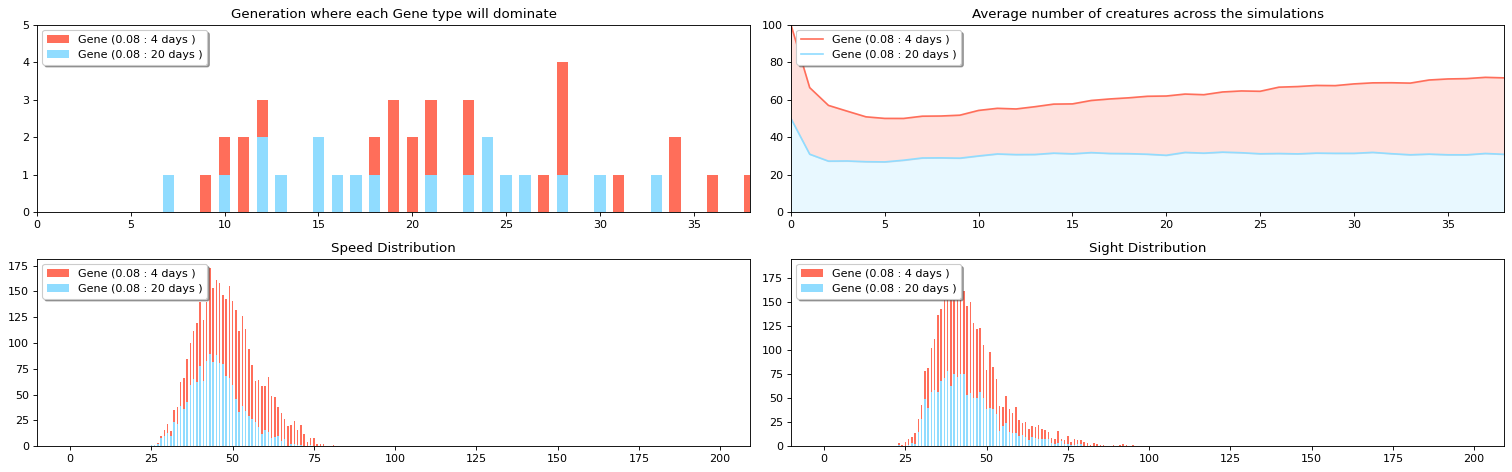

In [13]:
simulation_gene_comparison_nsim(mutantvalueA = 0.08,mutantvalueB = 0.08,AGE = {'A':4,'B':20},number_of_simulations = 50,n_gen = 40)

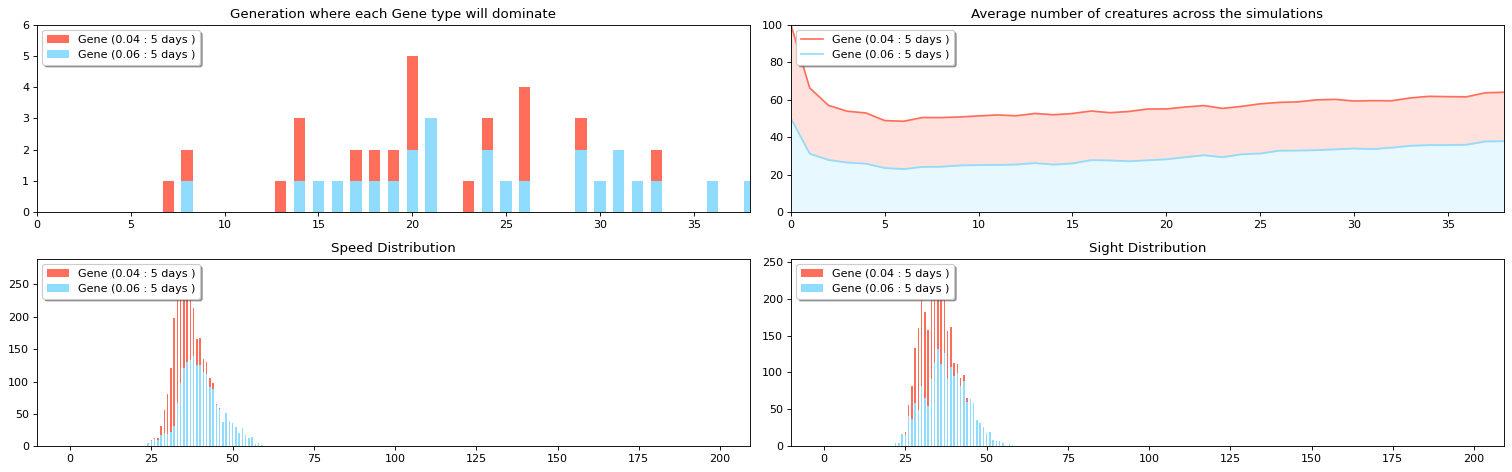

In [14]:
simulation_gene_comparison_nsim(mutantvalueA = 0.04,mutantvalueB = 0.06,AGE = {'A':5,'B':5},number_of_simulations = 50,n_gen = 40)

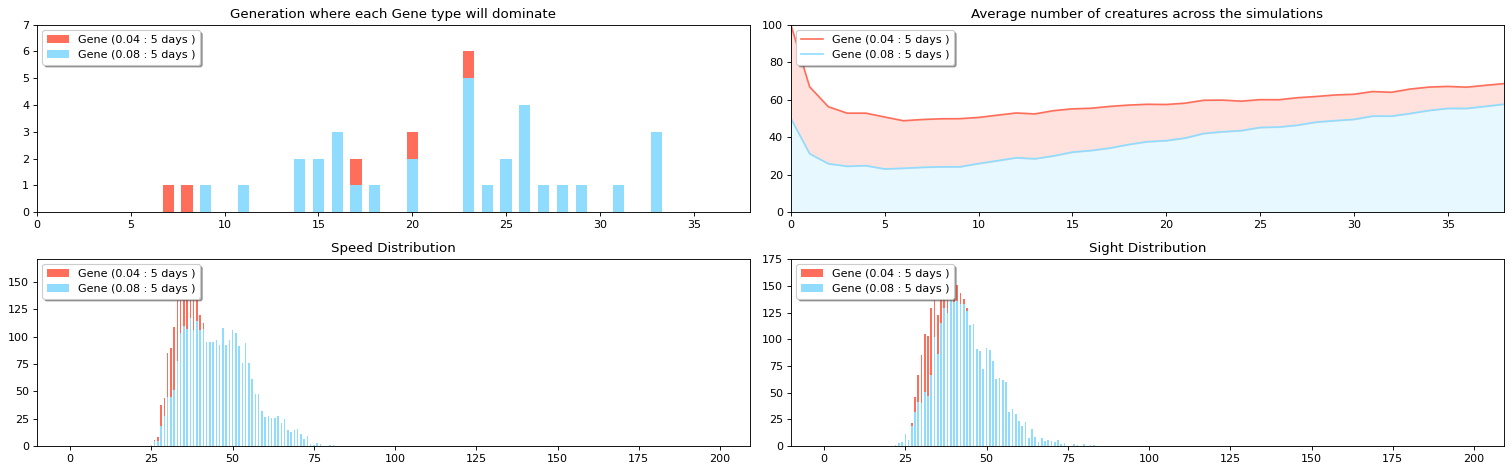

In [15]:
simulation_gene_comparison_nsim(mutantvalueA = 0.04,mutantvalueB = 0.08,AGE = {'A':5,'B':5},number_of_simulations = 50,n_gen = 40)

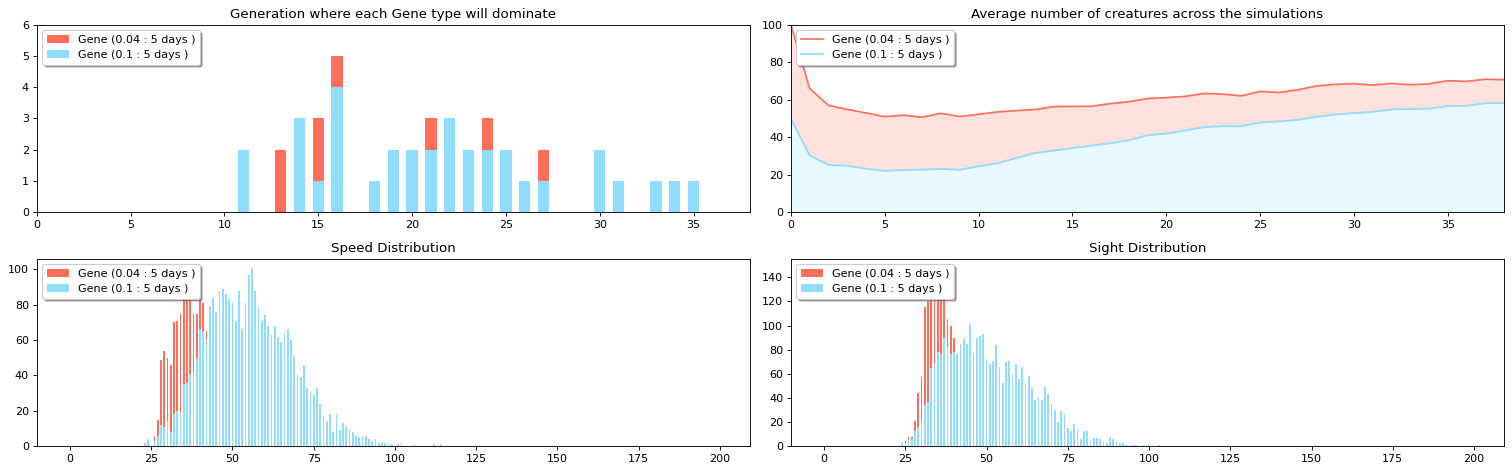

In [16]:
simulation_gene_comparison_nsim(mutantvalueA = 0.04,mutantvalueB = 0.1,AGE = {'A':5,'B':5},number_of_simulations = 50,n_gen = 40)

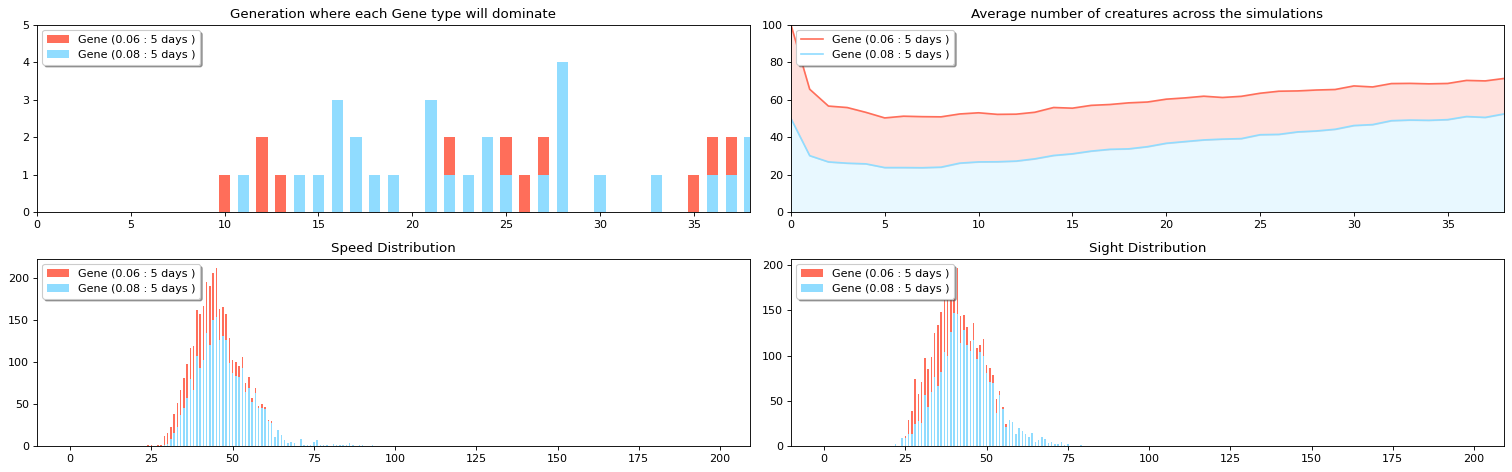

In [17]:
simulation_gene_comparison_nsim(mutantvalueA = 0.06,mutantvalueB = 0.08,AGE = {'A':5,'B':5},number_of_simulations = 50,n_gen = 40)

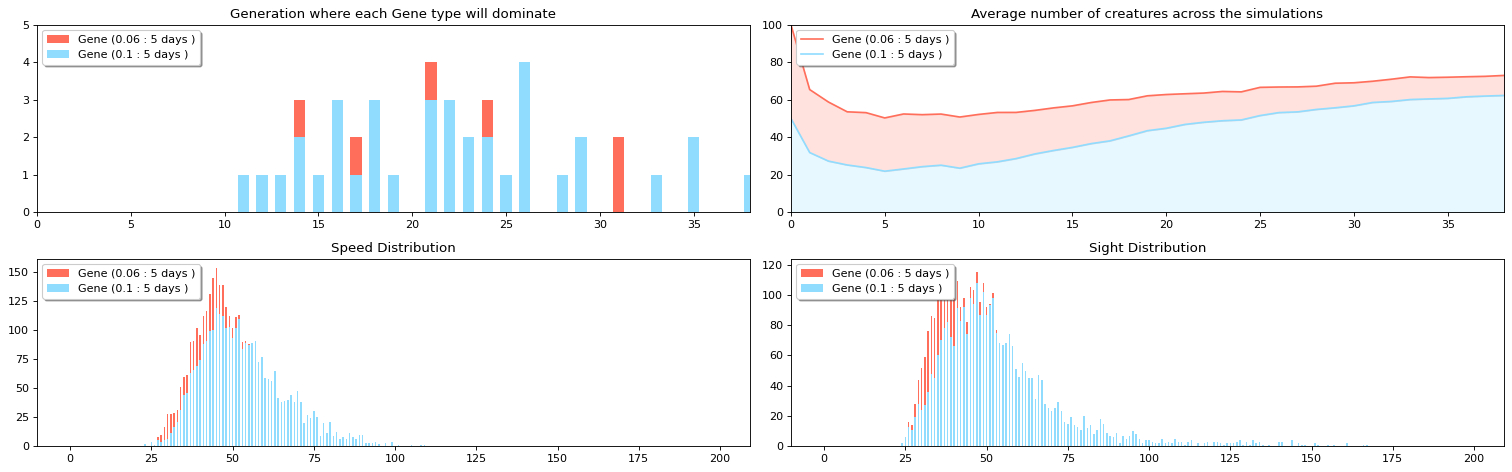

In [18]:
simulation_gene_comparison_nsim(mutantvalueA = 0.06,mutantvalueB = 0.1,AGE = {'A':5,'B':5},number_of_simulations = 50,n_gen = 40)